In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.metrics.distance import edit_distance
from nltk.corpus import words, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.probability import FreqDist

In [203]:
pd.set_option('display.max_colwidth', 5000)
pd.options.display.max_rows=100

### CORRECTOR GRAMATICAL PRIMITIVO

In [204]:
palabras_incorrectas=['happpy', 'woords', 'exmple']

In [205]:
palabras_correctas=words.words()

In [206]:
len(palabras_correctas)

236736

 <div style="background-color: rgb(248, 255, 174); padding: 10px; border-radius: 8px;">
    <h2 style="color: black; font-family: 'Arial'; text-align: center;">
        USTEDES: DADO EL CONJUNTO DE DATOS SPAM.CSV, HAGAN UN CORRECTOR GRAMATICAL USANDO LAS IDEAS DE ARRIBA
    </h2>
</div>


In [207]:
def spell_sentence_corrector(sentence_tokens):
    """ 
    Esta función toma una lista de tokens de palabras como entrada y devuelve una lista de palabras corregidas.
    Utiliza la métrica de distancia de edición para encontrar la coincidencia más cercana menor que cuatro.
    """
    for index, word in enumerate(sentence_tokens):
        temp = [(edit_distance(word, w), w) for w in palabras_correctas if w[0] == word[0]]
        temp.sort()
        
        # Reemplaza el token si la distancia de edición es <= 3
        if temp and temp[0][0] <= 3:
            sentence_tokens[index] = temp[0][1]

    return sentence_tokens  


In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [210]:
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']
del df['v1']


In [212]:
df.rename(columns={"v2":"text"}, inplace=True)

In [ ]:
# Extraer la columna 'v2' y filtrar palabras
palabras_incorrectas = (
    df['text']
    .dropna()  
    .astype(str) 
)

tokenized = palabras_incorrectas.apply(word_tokenize)
#tokenized = tokenized.apply(lambda sentence: spell_sentence_corrector(sentence))
tokenized[0] = spell_sentence_corrector(tokenized[0])
tokenized[0] = ' '.join(tokenized[0])
tokenized[0]

'G until juring point , crazy .. Available only in baris n great world la e buffet ... Cain there got adore wat ...'

### PREPROCESAMIENTO DE TEXTOS A NIVEL DE PALABRA

In [213]:
df

,text
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives around here though"
...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other suggestions?"
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [214]:
df["text"]=df["text"].apply(lambda x: x.lower())

In [215]:
df

,text
0,"go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."
1,ok lar... joking wif u oni...
2,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
3,u dun say so early hor... u c already then say...
4,"nah i don't think he goes to usf, he lives around here though"
...,...
5567,"this is the 2nd time we have tried 2 contact u. u have won the å£750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate."
5568,will ì_ b going to esplanade fr home?
5569,"pity, * was in mood for that. so...any other suggestions?"
5570,the guy did some bitching but i acted like i'd be interested in buying something else next week and he gave it to us for free


In [216]:
# Yo hice la tokenizacion, mensaje por mensaje

df["text_tokens"]=df["text"].apply(lambda x: word_tokenize(x))

In [217]:
df

,text,text_tokens
0,"go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","[go, until, jurong, point, ,, crazy, .., available, only, in, bugis, n, great, world, la, e, buffet, ..., cine, there, got, amore, wat, ...]"
1,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005., text, fa, to, 87121, to, receive, entry, question, (, std, txt, rate, ), t, &, c, 's, apply, 08452810075over18, 's]"
3,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, already, then, say, ...]"
4,"nah i don't think he goes to usf, he lives around here though","[nah, i, do, n't, think, he, goes, to, usf, ,, he, lives, around, here, though]"
...,...,...
5567,"this is the 2nd time we have tried 2 contact u. u have won the å£750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","[this, is, the, 2nd, time, we, have, tried, 2, contact, u., u, have, won, the, å£750, pound, prize, ., 2, claim, is, easy, ,, call, 087187272008, now1, !, only, 10p, per, minute, ., bt-national-rate, .]"
5568,will ì_ b going to esplanade fr home?,"[will, ì_, b, going, to, esplanade, fr, home, ?]"
5569,"pity, * was in mood for that. so...any other suggestions?","[pity, ,, *, was, in, mood, for, that, ., so, ..., any, other, suggestions, ?]"
5570,the guy did some bitching but i acted like i'd be interested in buying something else next week and he gave it to us for free,"[the, guy, did, some, bitching, but, i, acted, like, i, 'd, be, interested, in, buying, something, else, next, week, and, he, gave, it, to, us, for, free]"


In [218]:
# Tokenizando el texto general
# remove symbols
df['text'] = df['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
all_words = ' '.join([word for word in df['text']])

In [219]:
all_words

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ok lar joking wif u oni free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs u dun say so early hor u c already then say nah i dont think he goes to usf he lives around here though freemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send  to rcv even my brother is not like to speak with me they treat me like aids patent as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press  to copy your friends callertune winner as a valued network customer you have been selected to receivea  prize reward to claim call  claim code kl valid  hours only had your mobile  months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on  im gon

In [220]:
tokens=word_tokenize(all_words)

In [221]:
len(tokens)

82453

In [222]:
freq=FreqDist(tokens)

 <div style="background-color: rgb(248, 255, 174); padding: 10px; border-radius: 8px;">
    <h2 style="color: black; font-family: 'Arial'; text-align: center;">
USTEDES GRAFIQUEN ESTAS FRECUENCIAS PARA VER CUALES SON LOS TOKENS MAS COMUNES
    </h2>
</div>


<Axes: xlabel='Samples', ylabel='Counts'>

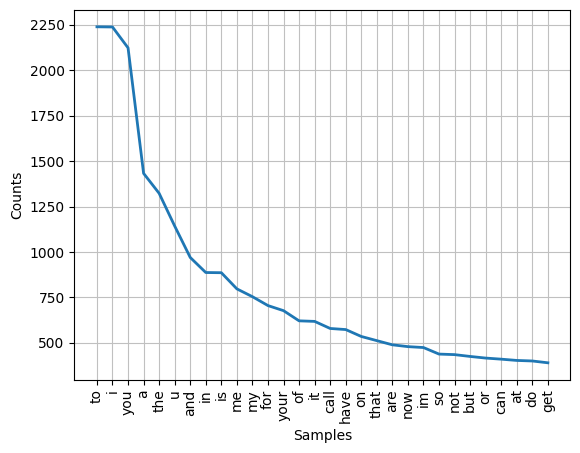

In [223]:
freq.plot(30)

In [224]:
stopwords=stopwords.words('english')

 <div style="background-color: rgb(248, 255, 174); padding: 10px; border-radius: 8px;">
    <h2 style="color: black; font-family: 'Arial'; text-align: center;">
        Quitando los stopwords de los tokens de los textos en el dataframe
    </h2>
</div>


In [225]:
df["text_no_stopwords"]=df['text_tokens'].apply(lambda x: [word for word in x if word not in stopwords])

In [226]:
df

,text,text_tokens,text_no_stopwords
0,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, ,, crazy, .., available, only, in, bugis, n, great, world, la, e, buffet, ..., cine, there, got, amore, wat, ...]","[go, jurong, point, ,, crazy, .., available, bugis, n, great, world, la, e, buffet, ..., cine, got, amore, wat, ...]"
1,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]"
2,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005., text, fa, to, 87121, to, receive, entry, question, (, std, txt, rate, ), t, &, c, 's, apply, 08452810075over18, 's]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005., text, fa, 87121, receive, entry, question, (, std, txt, rate, ), &, c, 's, apply, 08452810075over18, 's]"
3,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, already, then, say, ...]","[u, dun, say, early, hor, ..., u, c, already, say, ...]"
4,nah i dont think he goes to usf he lives around here though,"[nah, i, do, n't, think, he, goes, to, usf, ,, he, lives, around, here, though]","[nah, n't, think, goes, usf, ,, lives, around, though]"
...,...,...,...
5567,this is the nd time we have tried contact u u have won the pound prize claim is easy call now only p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u., u, have, won, the, å£750, pound, prize, ., 2, claim, is, easy, ,, call, 087187272008, now1, !, only, 10p, per, minute, ., bt-national-rate, .]","[2nd, time, tried, 2, contact, u., u, å£750, pound, prize, ., 2, claim, easy, ,, call, 087187272008, now1, !, 10p, per, minute, ., bt-national-rate, .]"
5568,will b going to esplanade fr home,"[will, ì_, b, going, to, esplanade, fr, home, ?]","[ì_, b, going, esplanade, fr, home, ?]"
5569,pity was in mood for that soany other suggestions,"[pity, ,, *, was, in, mood, for, that, ., so, ..., any, other, suggestions, ?]","[pity, ,, *, mood, ., ..., suggestions, ?]"
5570,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free,"[the, guy, did, some, bitching, but, i, acted, like, i, 'd, be, interested, in, buying, something, else, next, week, and, he, gave, it, to, us, for, free]","[guy, bitching, acted, like, 'd, interested, buying, something, else, next, week, gave, us, free]"


 <div style="background-color: rgb(248, 255, 174); padding: 10px; border-radius: 8px;">
    <h2 style="color: black; font-family: 'Arial'; text-align: center;">
        USTEDES: 
        <br>
        1. GUARDEN TODAS LAS RAICES EN UNA LISTA Y CUENTEN LA CANTIDAD DISTINTA QUE HAY DE RAICES
   <br>
        2. HAGAN LA EXTRACCION DE RAICES POR MENSAJE EN EL DATAFRAME, USANDO LA COLUMNA DE NO STOPWORDS..CREEN UNA NUEVA COLUMNA
    </h2>
</div>


In [227]:
# Buscar raices de palabras
stemmer = PorterStemmer()

stemmers = set()
for token in tokens:
    stemmers.add(stemmer.stem(token))

len(stemmers)

7162

In [228]:
df["text_stemmed"]=df['text_no_stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])
df

,text,text_tokens,text_no_stopwords,text_stemmed
0,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, ,, crazy, .., available, only, in, bugis, n, great, world, la, e, buffet, ..., cine, there, got, amore, wat, ...]","[go, jurong, point, ,, crazy, .., available, bugis, n, great, world, la, e, buffet, ..., cine, got, amore, wat, ...]","[go, jurong, point, ,, crazi, .., avail, bugi, n, great, world, la, e, buffet, ..., cine, got, amor, wat, ...]"
1,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]"
2,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005., text, fa, to, 87121, to, receive, entry, question, (, std, txt, rate, ), t, &, c, 's, apply, 08452810075over18, 's]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005., text, fa, 87121, receive, entry, question, (, std, txt, rate, ), &, c, 's, apply, 08452810075over18, 's]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005., text, fa, 87121, receiv, entri, question, (, std, txt, rate, ), &, c, 's, appli, 08452810075over18, 's]"
3,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, already, then, say, ...]","[u, dun, say, early, hor, ..., u, c, already, say, ...]","[u, dun, say, earli, hor, ..., u, c, alreadi, say, ...]"
4,nah i dont think he goes to usf he lives around here though,"[nah, i, do, n't, think, he, goes, to, usf, ,, he, lives, around, here, though]","[nah, n't, think, goes, usf, ,, lives, around, though]","[nah, n't, think, goe, usf, ,, live, around, though]"
...,...,...,...,...
5567,this is the nd time we have tried contact u u have won the pound prize claim is easy call now only p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u., u, have, won, the, å£750, pound, prize, ., 2, claim, is, easy, ,, call, 087187272008, now1, !, only, 10p, per, minute, ., bt-national-rate, .]","[2nd, time, tried, 2, contact, u., u, å£750, pound, prize, ., 2, claim, easy, ,, call, 087187272008, now1, !, 10p, per, minute, ., bt-national-rate, .]","[2nd, time, tri, 2, contact, u., u, å£750, pound, prize, ., 2, claim, easi, ,, call, 087187272008, now1, !, 10p, per, minut, ., bt-national-r, .]"
5568,will b going to esplanade fr home,"[will, ì_, b, going, to, esplanade, fr, home, ?]","[ì_, b, going, esplanade, fr, home, ?]","[ì_, b, go, esplanad, fr, home, ?]"
5569,pity was in mood for that soany other suggestions,"[pity, ,, *, was, in, mood, for, that, ., so, ..., any, other, suggestions, ?]","[pity, ,, *, mood, ., ..., suggestions, ?]","[piti, ,, *, mood, ., ..., suggest, ?]"
5570,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free,"[the, guy, did, some, bitching, but, i, acted, like, i, 'd, be, interested, in, buying, something, else, next, week, and, he, gave, it, to, us, for, free]","[guy, bitching, acted, like, 'd, interested, buying, something, else, next, week, gave, us, free]","[guy, bitch, act, like, 'd, interest, buy, someth, els, next, week, gave, us, free]"


<div style="background-color: rgb(248, 255, 174); padding: 10px; border-radius: 8px;">
    <h2 style="color: black; font-family: 'Arial'; text-align: center;">
        USTEDES: 
        <br>
        1. GUARDEN TODOS LOS LEMMAS EN UNA LISTA Y CUENTEN LA CANTIDAD DISTINTA QUE HAY DE LEMMAS
        <br>
        2. HAGAN LA EXTRACCION DE LEMMAS POR MENSAJE EN EL DATAFRAME, USANDO LA COLUMNA DE NO STOPWORDS..CREEN UNA NUEVA COLUMNA
    </h2>
</div>

In [229]:
# Buscar lemmas (forma base del diccionario) de palabras

lemmatizer = WordNetLemmatizer()

lemmatizers = set()
for token in tokens:
    lemmatizers.add(lemmatizer.lemmatize(token))

len(lemmatizers)

7988

In [230]:
df["text_lemmatized"]=df['text_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(token, 'n') for token in tokens])
df["text_lemmatized"]=df['text_lemmatized'].apply(lambda tokens: [lemmatizer.lemmatize(token, 'v') for token in tokens])
df["text_lemmatized"]=df['text_lemmatized'].apply(lambda tokens: [lemmatizer.lemmatize(token, 'a') for token in tokens])
df["text_lemmatized"]=df['text_lemmatized'].apply(lambda tokens: [lemmatizer.lemmatize(token, 'r') for token in tokens])
df["text_lemmatized"]=df['text_lemmatized'].apply(lambda tokens: [lemmatizer.lemmatize(token, 's') for token in tokens])
df

,text,text_tokens,text_no_stopwords,text_stemmed,text_lemmatized
0,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,"[go, until, jurong, point, ,, crazy, .., available, only, in, bugis, n, great, world, la, e, buffet, ..., cine, there, got, amore, wat, ...]","[go, jurong, point, ,, crazy, .., available, bugis, n, great, world, la, e, buffet, ..., cine, got, amore, wat, ...]","[go, jurong, point, ,, crazi, .., avail, bugi, n, great, world, la, e, buffet, ..., cine, got, amor, wat, ...]","[go, jurong, point, ,, crazy, .., available, bugis, n, great, world, la, e, buffet, ..., cine, get, amore, wat, ...]"
1,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]","[ok, lar, ..., joke, wif, u, oni, ...]"
2,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005., text, fa, to, 87121, to, receive, entry, question, (, std, txt, rate, ), t, &, c, 's, apply, 08452810075over18, 's]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005., text, fa, 87121, receive, entry, question, (, std, txt, rate, ), &, c, 's, apply, 08452810075over18, 's]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005., text, fa, 87121, receiv, entri, question, (, std, txt, rate, ), &, c, 's, appli, 08452810075over18, 's]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005., text, fa, 87121, receive, entry, question, (, std, txt, rate, ), &, c, 's, apply, 08452810075over18, 's]"
3,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, already, then, say, ...]","[u, dun, say, early, hor, ..., u, c, already, say, ...]","[u, dun, say, earli, hor, ..., u, c, alreadi, say, ...]","[u, dun, say, early, hor, ..., u, c, already, say, ...]"
4,nah i dont think he goes to usf he lives around here though,"[nah, i, do, n't, think, he, goes, to, usf, ,, he, lives, around, here, though]","[nah, n't, think, goes, usf, ,, lives, around, though]","[nah, n't, think, goe, usf, ,, live, around, though]","[nah, n't, think, go, usf, ,, life, around, though]"
...,...,...,...,...,...
5567,this is the nd time we have tried contact u u have won the pound prize claim is easy call now only p per minute btnationalrate,"[this, is, the, 2nd, time, we, have, tried, 2, contact, u., u, have, won, the, å£750, pound, prize, ., 2, claim, is, easy, ,, call, 087187272008, now1, !, only, 10p, per, minute, ., bt-national-rate, .]","[2nd, time, tried, 2, contact, u., u, å£750, pound, prize, ., 2, claim, easy, ,, call, 087187272008, now1, !, 10p, per, minute, ., bt-national-rate, .]","[2nd, time, tri, 2, contact, u., u, å£750, pound, prize, ., 2, claim, easi, ,, call, 087187272008, now1, !, 10p, per, minut, ., bt-national-r, .]","[2nd, time, try, 2, contact, u., u, å£750, pound, prize, ., 2, claim, easy, ,, call, 087187272008, now1, !, 10p, per, minute, ., bt-national-rate, .]"
5568,will b going to esplanade fr home,"[will, ì_, b, going, to, esplanade, fr, home, ?]","[ì_, b, going, esplanade, fr, home, ?]","[ì_, b, go, esplanad, fr, home, ?]","[ì_, b, go, esplanade, fr, home, ?]"
5569,pity was in mood for that soany other suggestions,"[pity, ,, *, was, in, mood, for, that, ., so, ..., any, other, suggestions, ?]","[pity, ,, *, mood, ., ..., suggestions, ?]","[piti, ,, *, mood, ., ..., suggest, ?]","[pity, ,, *, mood, ., ..., suggestion, ?]"
5570,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free,"[the, guy, did, some, bitching, but, i, acted, like, i, 'd, be, interested, in, buying, something, else, next, week, and, he, gave, it, to, us, for, free]","[guy, bitching, acted, like, 'd, interested, buying, something, else, next, week, gave, us, free]","[